In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
	Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the corpus
corpus = ['The cat sat on the mat',
		'The dog ran in the park',
		'The bird sang in the tree']

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)


After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [2]:
# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
	for i in range(window_size, len(sequence) - window_size):
		context = sequence[i - window_size:i] +\
			sequence[i + 1:i + window_size + 1]
		target = sequence[i]
		contexts.append(context)
		targets.append(target)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
					output_dim=embedding_size,
					input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')


# Load the pre-trained weights
model.load_weights('cbow_weights.h5')


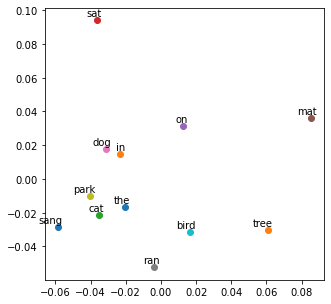

In [3]:
# Get the word embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
	x, y = reduced_embeddings[i]
	plt.scatter(x, y)
	plt.annotate(word, xy=(x, y), xytext=(5, 2),
				textcoords='offset points',
				ha='right', va='bottom')
plt.show()
